In [1]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn import decomposition
from matplotlib.backends.backend_pdf import PdfPages
import importlib
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering
import seaborn as sns
import umap

sys.path.append('..')
import catrace
from catrace import dataio
import catrace.process_time_trace as ptt
import catrace.plot_trace as pltr
import catrace.pattern_correlation as pcr
import catrace.exp_collection as ecl
import catrace.cluster as catclust
from catrace.frame_time import convert_sec_to_frame
from catrace.trace_dataframe import concatenate_planes
import catrace.frame_time as frame_time
import dataset_param as dtpar

In [101]:
exp_list = [( '2021-02-05-DpOBEM-JH9','phe-arg'),
            ('2021-03-18-DpOBEM-JH10','phe-arg'),
            ('2021-03-19-DpOBEM-JH10','phe-arg'),
            ('2021-04-02-DpOBEM-JH11','phe-arg'),
            ('2021-04-03-DpOBEM-JH11','phe-arg'),
            ('2021-05-01-DpOBEM-JH13','phe-arg'),
            ('2021-05-22-DpOBEM-JH14','phe-arg'),
            ('2021-07-15-DpOBEM-N2'  ,'naive'),
            ('2021-07-16-DpOBEM-N3' ,'naive'),
            ('2021-07-30-DpOBEM-JH17','arg-phe'),
            ('2021-07-31-DpOBEM-JH17','arg-phe'),
            ('2021-09-02-DpOBEM-JH18','arg-phe'),
            ('2021-09-03-DpOBEM-JH18','arg-phe'),
            ('2021-09-04-DpOBEM-JH18','arg-phe'),
            ('2021-09-15-DpOBEM-JH20','phe-arg'),
            ('2021-09-17-DpOBEM-JH20','phe-arg'),
            ('2021-09-18-DpOBEM-JH20','phe-arg'),
            ('2021-09-29-DpOBEM-JH21','arg-phe'),
            ('2021-10-01-DpOBEM-JH21','arg-phe'),
            ('2021-10-02-DpOBEM-JH21','arg-phe'),
            ('2021-11-10-DpOBEM-JH23','phe-trp'),
            ('2021-11-14-DpOBEM-JH23','phe-trp'),
            ('2021-11-24-DpOBEM-JH24','phe-trp'),
            ('2021-11-27-DpOBEM-JH24','phe-trp'),
            ('2021-11-26-DpOBEM-JH24','phe-trp'),
            ('2021-12-10-DpOBEM-N4','naive'),
            ('2021-12-31-DpOBEM-N7','naive'),
            ('2022-01-23-DpOBEM-N8','naive'),
            ('2022-01-30-DpOBEM-N9','naive'),
            ('2022-02-13-DpOBEM-N10','naive'),
            ('2022-02-20-DpOBEM-N11','naive')]


region_list = ['Dp', 'OB']
frame_rate = 30/4
#num_trial = 3
exp_info = dict(num_trial=3)
# TODO odor list bile acid order might be wrong!!
odor_list = ['phe', 'trp', 'arg', 'tdca', 'tca', 'gca', 'acsf', 'spont']
#plane_nb_list = np.array([1,2,3,4]) - 1
data_root_dir = '/media/hubo/WD_BoHu/BCE/Ca_imaging/results/'
dfovf_dict = dict()
load_data = False
if load_data:
    for region in region_list:
        dfovf_dict[region] = dict()
        for exp in exp_list:
            exp_name = exp[0]
            print(exp_name, region)
            dfovf_dict[region][exp_name] = ecl.load_dfovf(data_root_dir, exp_name, region)

2021-02-05-DpOBEM-JH9 Dp


FileNotFoundError: [Errno 2] No such file or directory: '/media/hubo/WD_BoHu/BCE/Ca_imaging/results/2021-02-05-DpOBEM-JH9/time_trace/plane01/timetrace.mat'

Plot averaged time course for each odor (used to determine the time window for computing tuning curve)

In [4]:
region = 'OB'
all_response = pd.read_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
import catrace.scale as catscale
from sklearn.cluster import KMeans, AgglomerativeClustering
H = catscale.standard_scale(all_response)
data = H.transpose()
fish_id = data.index.get_level_values('fish_id')
training_dict = dict(dtpar.exp_list)
train_cond= fish_id.map(training_dict)
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']
cond_order = {k: v for v, k in enumerate(cond_list)}
cond_order
cond_idx = train_cond.map(cond_order)


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [4]:
import phenograph
import importlib
importlib.reload(phenograph)
k=40
communities_raw, graph, Q = phenograph.cluster(data, k=k)

Finding 40 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 21.327064275741577 seconds
Jaccard graph constructed in 3.2835211753845215 seconds
Wrote graph to binary file in 0.6384408473968506 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.744232
After 4 runs, maximum modularity is Q = 0.747347
Louvain completed 24 runs in 29.547659397125244 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 55.05407381057739 seconds


/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


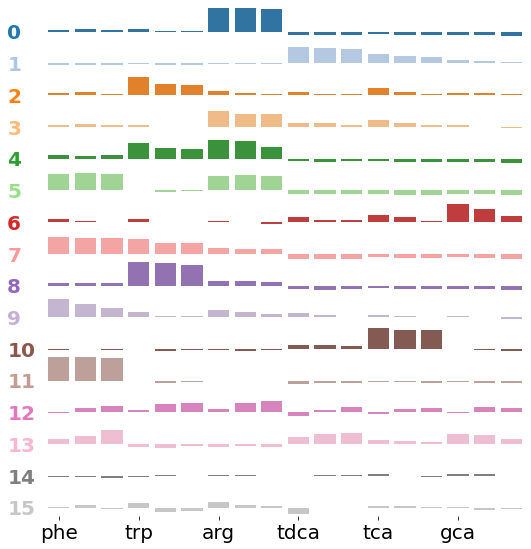

In [5]:
importlib.reload(catclust)
cluster_mean_df_raw = catclust.get_cluster_mean_df(H, communities_raw)
fig = catclust.plot_cluster_tuning(cluster_mean_df_raw, cmap="tab20")
fig_dir = "/home/hubo/Projects/Ca_imaging/results/JH_analysis/figures"
fig.savefig(os.path.join(fig_dir, "cluster_mean.svg"))

In [6]:
def plot_cluster_cont_with_stat(pairs):
    hue_plot_params = dict(x="cluster_id", y="ratio", hue="train_cond", hue_order=dtpar.cond_list,
                           data=cluster_count_df, palette="Set3")

    with sns.plotting_context("notebook", font_scale = 1.4):
    # Create new plot
        fig, ax = plt.subplots(figsize=(16,10))

    # Plot with seaborn
        ax = sns.boxplot(ax=ax, **hue_plot_params)

    # Add annotations
        annotator = Annotator(ax, pairs, **hue_plot_params)
        annotator.configure(test="t-test_ind").apply_and_annotate()

    # Label and show
        legend = ax.legend()
        frame = legend.get_frame()
        frame.set_facecolor('white')
        ax.set_ylabel('#neurons in cluster/total #neurons')
    return annotator, fig

def get_significant_pairs(annotator):
    new_pairs = [[ano.data.group1, ano.data.group2] for ano in annotator.annotations if ano.data.pvalue < 0.05]
    return new_pairs

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5_arg-phe vs. 5_phe-trp: t-test independent samples, P_val:1.297e-01 t=1.638e+00
6_arg-phe vs. 6_phe-trp: t-test independent samples, P_val:3.756e-01 t=-9.234e-01
7_arg-phe vs. 7_phe-trp: t-test independent samples, P_val:2.563e-02 t=-2.579e+00
8_arg-phe vs. 8_phe-trp: t-test independent samples, P_val:1.454e-01 t=-1.567e+00
9_arg-phe vs. 9_phe-trp: t-test independent samples, P_val:6.492e-01 t=4.676e-01
10_arg-phe vs. 10_phe-trp: t-test independent samples, P_val:1.970e-01 t=-1.373e+00
11_arg-phe vs. 11_phe-trp: t-test independent samples, P_val:6.065e-01 t=-5.302e-01
12_arg-phe vs. 12_phe-trp: t-test independent samples, P_val:4.677e-01 t=7.522e-01
13_arg-phe vs. 13_phe-trp: t-test independent samples, P_val:1.386e-01 t=-1.597e+00
14_arg-phe vs. 14_phe-trp: t-test independent samples, P_val:4.592e-01 t=7.6

5_arg-phe vs. 5_naive: t-test independent samples, P_val:1.954e-04 t=4.998e+00
7_phe-arg vs. 7_phe-trp: t-test independent samples, P_val:1.657e-02 t=-2.749e+00
0_arg-phe vs. 0_naive: t-test independent samples, P_val:2.283e-02 t=2.556e+00
11_arg-phe vs. 11_naive: t-test independent samples, P_val:3.668e-02 t=-2.310e+00
13_phe-arg vs. 13_phe-trp: t-test independent samples, P_val:3.920e-02 t=-2.340e+00
11_phe-arg vs. 11_naive: t-test independent samples, P_val:4.432e-03 t=-3.309e+00


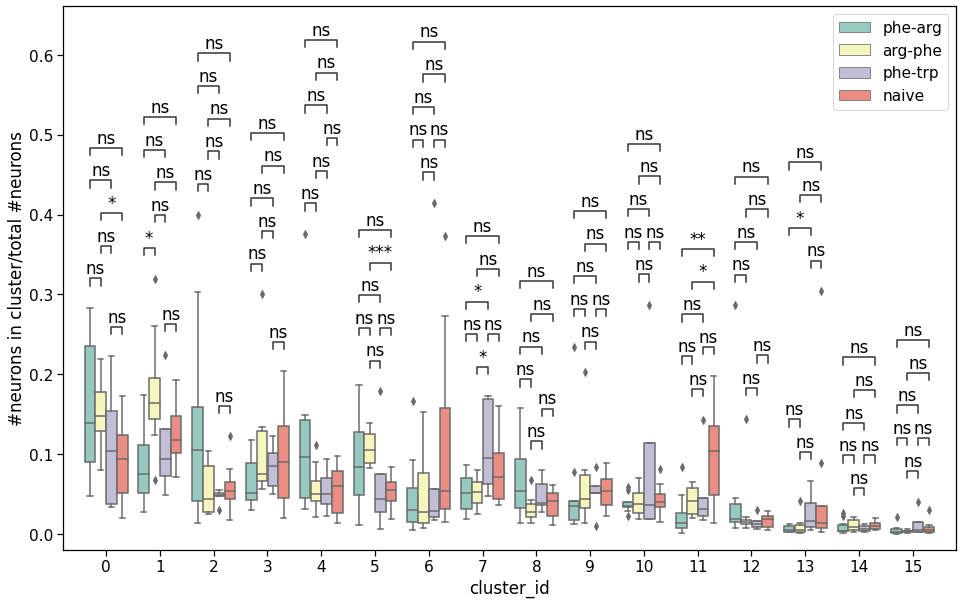

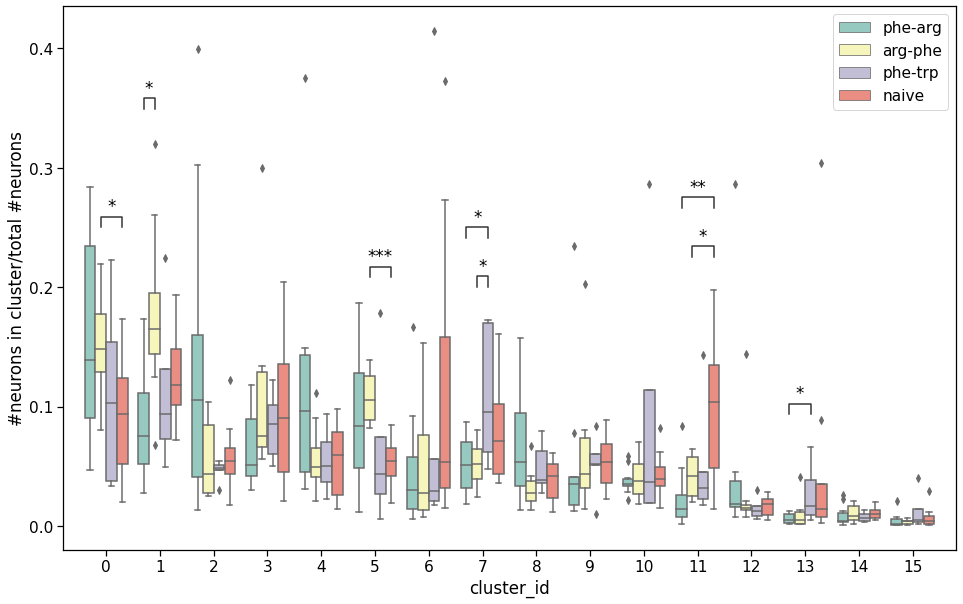

In [7]:
from statannotations.Annotator import Annotator
labels = communities_raw
n_clusters = len(np.unique(labels))
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
training_dict = dict(dtpar.exp_list)
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cluster_count_df = cluster_df.groupby('train_cond', sort=False).cluster_id.value_counts(normalize=True).sort_index().reindex(dtpar.cond_list, level='train_cond')
cluster_count_df
from itertools import combinations
cond_pair = list(combinations(dtpar.cond_list, 2))
all_pairs = []

for cluster_id in range(n_clusters):
    all_pairs.extend([[(cluster_id, x[0]), (cluster_id, x[1])] for x in cond_pair])
    
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
training_dict = dict(exp_list)
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']

grouped_cluster_id = cluster_df.groupby(['fish_id','train_cond'], sort=False).cluster_id
cluster_count_df = grouped_cluster_id.value_counts(normalize=True).sort_index().reindex(cond_list, level='train_cond')

cluster_count_df = cluster_count_df.rename('ratio').reset_index()
cluster_count_df

annotator, fig1 = plot_cluster_cont_with_stat(all_pairs)

new_pairs = get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = plot_cluster_cont_with_stat(new_pairs)
fig2.savefig(os.path.join(fig_dir, "cluster_cont.svg"))

In [9]:
cluster_df

,fish_id,plane,neuron,cluster_id,train_cond
0,2021-02-05-DpOBEM-JH9,0,4,2,phe-arg
1,2021-02-05-DpOBEM-JH9,0,7,8,phe-arg
2,2021-02-05-DpOBEM-JH9,0,10,5,phe-arg
3,2021-02-05-DpOBEM-JH9,0,11,2,phe-arg
4,2021-02-05-DpOBEM-JH9,0,15,7,phe-arg
...,...,...,...,...,...
28309,2022-02-20-DpOBEM-N11,3,233,8,naive
28310,2022-02-20-DpOBEM-N11,3,234,4,naive
28311,2022-02-20-DpOBEM-N11,3,235,11,naive
28312,2022-02-20-DpOBEM-N11,3,236,9,naive


In [10]:
cluster_df.to_pickle('../../../results/JH_analysis/cluster_df_{}.pkl'.format(region))

In [5]:
cluster_df = pd.read_pickle('../../../results/JH_analysis/cluster_df_{}.pkl'.format(region))

In [6]:
# Map cluster ID to neuron coordinates in the anatomy
from skimage.io import imread, imsave
expname = '2021-07-31-DpOBEM-JH17'
roi_stack_file = '/media/hubo/WD_BoHu/BCE/Ca_imaging/results/2021-07-31-DpOBEM-JH17/OB/roi/roi_stack.tif'
roi_stack = imread(roi_stack_file)

In [33]:
import catrace.nrn_coord as caroi
importlib.reload(caroi)
from catrace.nrn_coord import import_roi_stack, draw_stack, assign_meta, show_stack

In [10]:
rois= import_roi_stack(roi_stack)

In [11]:
meta_df = cluster_df.loc[cluster_df['fish_id'] == expname]
meta_df

,fish_id,plane,neuron,cluster_id,train_cond
11450,2021-07-31-DpOBEM-JH17,0,0,1,arg-phe
11451,2021-07-31-DpOBEM-JH17,0,2,7,arg-phe
11452,2021-07-31-DpOBEM-JH17,0,6,1,arg-phe
11453,2021-07-31-DpOBEM-JH17,0,10,1,arg-phe
11454,2021-07-31-DpOBEM-JH17,0,12,1,arg-phe
...,...,...,...,...,...
12156,2021-07-31-DpOBEM-JH17,3,180,0,arg-phe
12157,2021-07-31-DpOBEM-JH17,3,181,0,arg-phe
12158,2021-07-31-DpOBEM-JH17,3,182,7,arg-phe
12159,2021-07-31-DpOBEM-JH17,3,185,0,arg-phe


In [97]:
meta_df['neuron'].unique()

array([  0,   2,   6,  10,  12,  17,  18,  19,  23,  24,  25,  26,  29,
        30,  32,  33,  34,  36,  37,  38,  41,  42,  43,  45,  50,  52,
        53,  54,  56,  57,  60,  61,  62,  63,  65,  66,  69,  71,  73,
        75,  77,  78,  79,  81,  82,  85,  87,  88,  89,  90,  92,  94,
       102, 103, 105, 106, 108, 109, 110, 116, 117, 118, 119, 123, 125,
       128, 131, 132, 134, 135, 137, 141, 142, 143, 145, 147, 148, 151,
       153, 156, 157, 159, 160, 161, 162, 163, 170, 173, 178, 179, 181,
       183, 186, 187, 189, 190, 191, 193, 195, 196, 198, 199, 203, 204,
       206, 207, 214, 215, 216, 219, 221, 222, 223, 225, 229, 230, 231,
       232, 233, 237, 238, 241, 242, 243, 244, 245, 249, 251, 255, 257,
       258, 260, 263, 264, 266, 268, 271, 272, 273, 274, 275, 276, 278,
       280, 283, 284, 285, 287, 288, 291, 292, 293, 294, 297, 298, 300,
       304, 305, 307, 308, 309, 314, 316, 318, 321, 322, 325, 326, 331,
       332, 333, 334, 339, 340, 343, 347, 348, 351, 353, 356, 35

In [12]:
rois = assign_meta(rois, meta_df, 'cluster_id')

Skip ROI # 14 in plane 0
Skip ROI # 15 in plane 0
Skip ROI # 21 in plane 0
Skip ROI # 22 in plane 0
Skip ROI # 27 in plane 0
Skip ROI # 31 in plane 0
Skip ROI # 35 in plane 0
Skip ROI # 44 in plane 0
Skip ROI # 47 in plane 0
Skip ROI # 68 in plane 0
Skip ROI # 72 in plane 0
Skip ROI # 74 in plane 0
Skip ROI # 84 in plane 0
Skip ROI # 86 in plane 0
Skip ROI # 93 in plane 0
Skip ROI # 96 in plane 0
Skip ROI # 99 in plane 0
Skip ROI # 120 in plane 0
Skip ROI # 136 in plane 0
Skip ROI # 138 in plane 0
Skip ROI # 139 in plane 0
Skip ROI # 140 in plane 0
Skip ROI # 146 in plane 0
Skip ROI # 154 in plane 0
Skip ROI # 155 in plane 0
Skip ROI # 158 in plane 0
Skip ROI # 166 in plane 0
Skip ROI # 167 in plane 0
Skip ROI # 171 in plane 0
Skip ROI # 175 in plane 0
Skip ROI # 177 in plane 0
Skip ROI # 180 in plane 0
Skip ROI # 182 in plane 0
Skip ROI # 192 in plane 0
Skip ROI # 200 in plane 0
Skip ROI # 201 in plane 0
Skip ROI # 209 in plane 0
Skip ROI # 211 in plane 0
Skip ROI # 224 in plane 0
Ski

Skip ROI # 327 in plane 2
Skip ROI # 329 in plane 2
Skip ROI # 333 in plane 2
Skip ROI # 340 in plane 2
Skip ROI # 344 in plane 2
Skip ROI # 347 in plane 2
Skip ROI # 348 in plane 2
Skip ROI # 352 in plane 2
Skip ROI # 353 in plane 2
Skip ROI # 357 in plane 2
Skip ROI # 360 in plane 2
Skip ROI # 371 in plane 2
Skip ROI # 372 in plane 2
Skip ROI # 374 in plane 2
Skip ROI # 375 in plane 2
Skip ROI # 376 in plane 2
Skip ROI # 377 in plane 2
Skip ROI # 378 in plane 2
Skip ROI # 380 in plane 2
Skip ROI # 381 in plane 2
Skip ROI # 384 in plane 2
Skip ROI # 387 in plane 2
Skip ROI # 388 in plane 2
Skip ROI # 389 in plane 2
Skip ROI # 395 in plane 2
Skip ROI # 402 in plane 2
Skip ROI # 404 in plane 2
Skip ROI # 406 in plane 2
Skip ROI # 407 in plane 2
Skip ROI # 408 in plane 2
Skip ROI # 414 in plane 2
Skip ROI # 415 in plane 2
Skip ROI # 416 in plane 2
Skip ROI # 421 in plane 2
Skip ROI # 426 in plane 2
Skip ROI # 428 in plane 2
Skip ROI # 430 in plane 2
Skip ROI # 431 in plane 2
Skip ROI # 4

Skip ROI # 246 in plane 5
Skip ROI # 247 in plane 5
Skip ROI # 251 in plane 5
Skip ROI # 255 in plane 5
Skip ROI # 259 in plane 5
Skip ROI # 260 in plane 5
Skip ROI # 264 in plane 5
Skip ROI # 266 in plane 5
Skip ROI # 267 in plane 5
Skip ROI # 268 in plane 5
Skip ROI # 269 in plane 5
Skip ROI # 272 in plane 5
Skip ROI # 274 in plane 5
Skip ROI # 276 in plane 5
Skip ROI # 284 in plane 5
Skip ROI # 286 in plane 5
Skip ROI # 291 in plane 5
Skip ROI # 293 in plane 5
Skip ROI # 295 in plane 5
Skip ROI # 296 in plane 5
Skip ROI # 299 in plane 5
Skip ROI # 302 in plane 5
Skip ROI # 306 in plane 5
Skip ROI # 312 in plane 5
Skip ROI # 314 in plane 5
Skip ROI # 315 in plane 5
Skip ROI # 316 in plane 5
Skip ROI # 317 in plane 5
Skip ROI # 323 in plane 5
Skip ROI # 324 in plane 5
Skip ROI # 325 in plane 5
Skip ROI # 328 in plane 5
Skip ROI # 329 in plane 5
Skip ROI # 330 in plane 5
Skip ROI # 331 in plane 5
Skip ROI # 332 in plane 5
Skip ROI # 338 in plane 5
Skip ROI # 339 in plane 5
Skip ROI # 3

In [96]:
tag_list = [roi.tag for roi in rois]
set(tag_list)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [13]:
importlib.reload(caroi)
from catrace.nrn_coord import draw_stack
clust_stack = draw_stack(rois, roi_stack.shape, 'cluster_id')

In [89]:
clust_stack[0, :, :]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

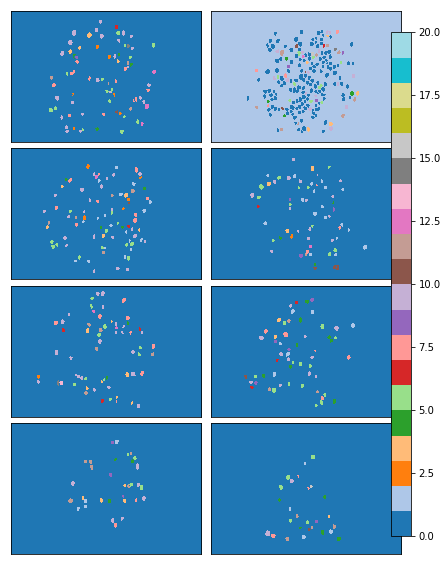

In [87]:
importlib.reload(caroi)
from catrace.nrn_coord import show_stack
matshow_kwargs = dict(vmin=0, vmax=20, cmap='tab20')
fig = show_stack(clust_stack, figsize=(7, 10), matshow_kwargs=matshow_kwargs)

In [88]:
clust_stack_file = '/media/hubo/WD_BoHu/BCE/Ca_imaging/results/2021-07-31-DpOBEM-JH17/OB/analysis/cluster_stack.tif'
imsave(clust_stack_file, clust_stack)